In [7]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt


# calculate condition for the startup time to be finite

In [8]:

# Define ranges for I_ST and Tdot_tot
I_ST_vals = np.linspace(0, 10, 1000)  # avoid zero to prevent division by zero
Tdot_tot_vals = np.linspace(1e17, 1e19, 1000)

I_ST_grid, Tdot_tot_grid = np.meshgrid(I_ST_vals, Tdot_tot_vals)

# Calculate N_ST for the grid (unitless)
N_ST_grid = (I_ST_grid / molecular_weight_T.to("kg/mol").magnitude) * N_A.magnitude

# Tritium decay constant (in 1/s, unitless)
lambda_T = (np.log(2) / ((12.32 * unit.year).to('s'))).magnitude

# Calculate ratio for the grid (unitless)
ratio_grid = N_ST_grid * lambda_T / Tdot_tot_grid

# Calculate startup_time for the grid (in seconds, unitless)
startup_time_grid = np.where(
    ratio_grid >= 1,
    np.inf,
    - (1 / lambda_T) * np.log(1 - ratio_grid)
)

# Mask infinite values for plotting
startup_time_grid = np.ma.masked_invalid(startup_time_grid)
startup_time_grid = np.ma.masked_greater(startup_time_grid, 1e10)  # mask very large times

/tmp/ipykernel_312977/2086089793.py:20: RuntimeWarning: invalid value encountered in log
  - (1 / lambda_T) * np.log(1 - ratio_grid)


/tmp/ipykernel_312977/2211140210.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  cp = plt.contourf(


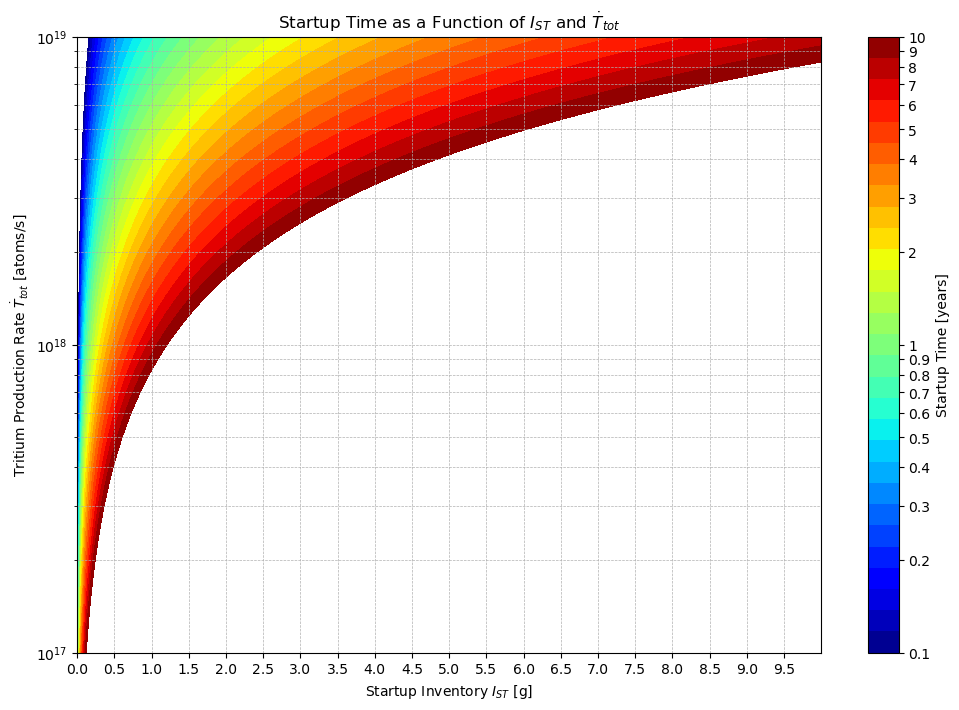

In [13]:
import matplotlib.colors as mcolors
import numpy as np

# Convert startup_time_grid from seconds to years
seconds_per_year = 365 * 24 * 3600
startup_time_grid_years = startup_time_grid / seconds_per_year

plt.figure(figsize=(12, 8))
# time limits (yr)
min_time = 0.1 # about a month 
max_time = 10   
# Define log-spaced levels and ticks
levels = np.logspace(np.log10(min_time), np.log10(max_time), num=30)  # more levels
# Major ticks at each decade, minor ticks at each integer within the decade
decades = np.arange(np.floor(np.log10(min_time)), np.ceil(np.log10(max_time))+1)
minor_ticks = []
for d in decades:
    for m in range(1, 10):
        tick = m * 10.0**d
        if min_time <= tick <= max_time:
            minor_ticks.append(tick)
minor_ticks = np.array(minor_ticks)

cp = plt.contourf(
    I_ST_grid,
    Tdot_tot_grid,
    startup_time_grid_years,
    levels=levels,
    cmap='jet',
    norm=mcolors.LogNorm(vmin=min_time, vmax=max_time)
)
cbar = plt.colorbar(cp, label='Startup Time [years]', ticks=minor_ticks)
cbar.ax.set_yticklabels([f'{t:.2g}' for t in minor_ticks])

plt.xticks(np.arange(0, 10, 0.5))
plt.xlabel('Startup Inventory $I_{ST}$ [g]')
plt.ylabel('Tritium Production Rate $\\dot{T}_{tot}$ [atoms/s]')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Startup Time as a Function of $I_{ST}$ and $\\dot{T}_{tot}$')
plt.show()